In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(font_scale=1.5)

In [115]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

tf.__version__

'2.1.0'

In [3]:
# datasets
bank = pd.read_csv('./banknotes.csv')
darts = pd.read_csv('./darts.csv')
irri = pd.read_csv('./irrigation_machine.csv', index_col=0)

In [5]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# Binary classification

## Exploring dollar bills

In [4]:
print(bank.shape)
bank.head()

(1372, 5)


,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variace   1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [7]:
bank.describe()

,variace,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [12]:
print(f"observations per class:\n{bank['class'].value_counts()}")

observations per class:
0    762
1    610
Name: class, dtype: int64


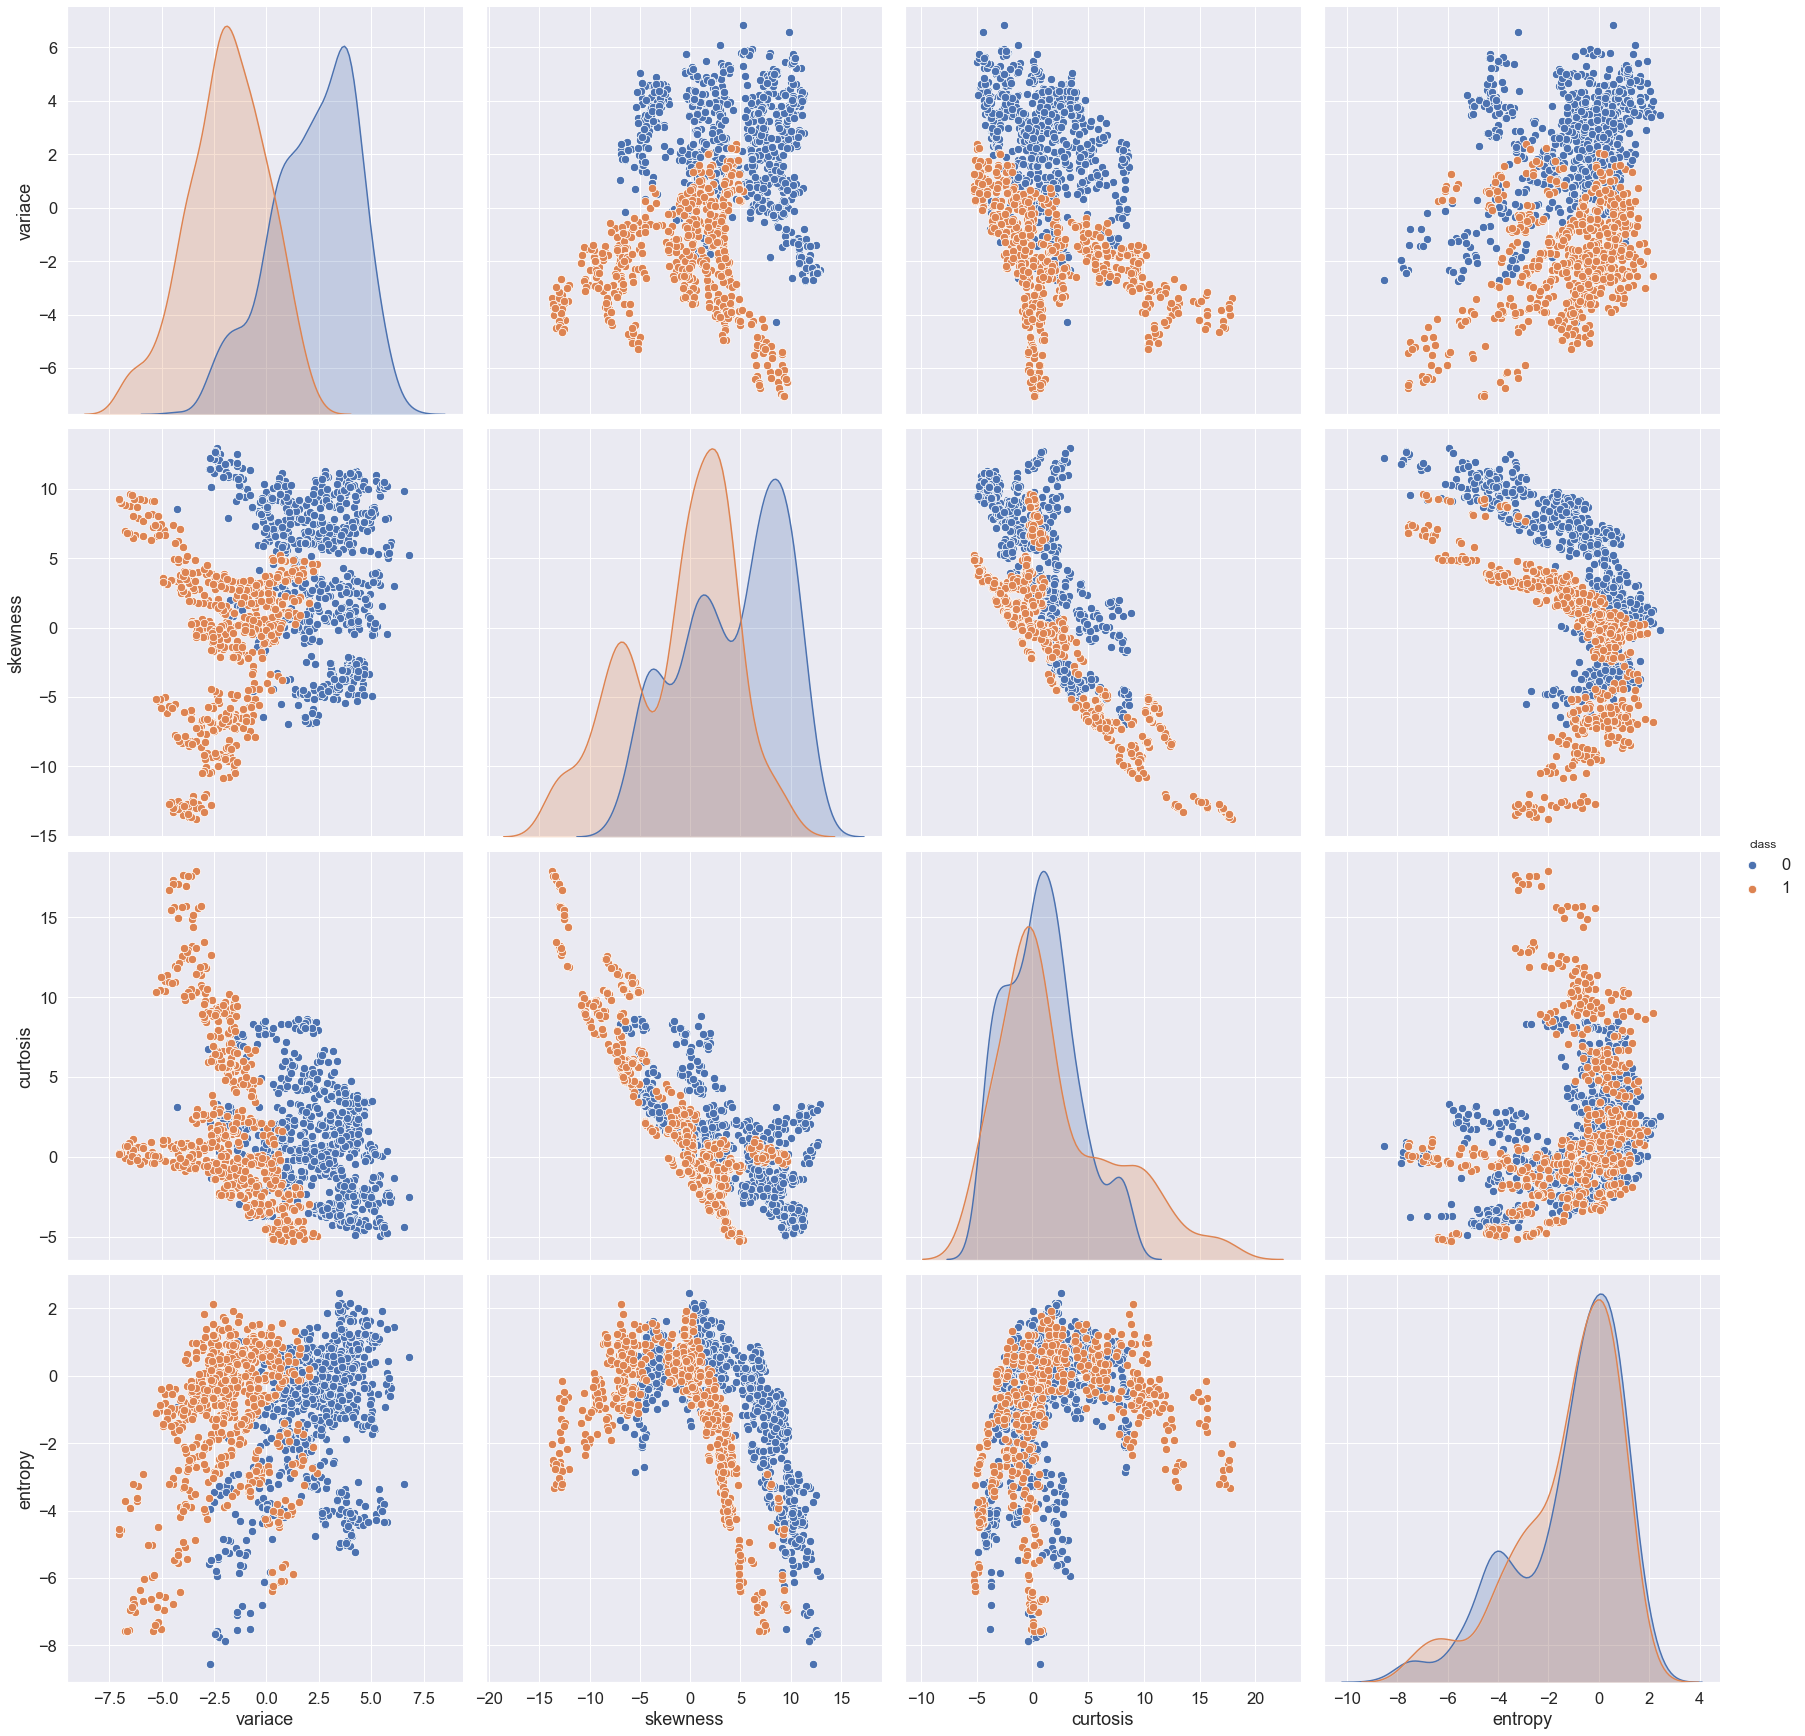

In [25]:
sns.pairplot(bank,
             hue='class',
             height=6,
             plot_kws={'s': 70})
plt.show()

Pairplot shows that there are features for which classes spread out noticeably. This gives us an intuition about our classes being easily separable.

## A binary classification model

In [29]:
# define model arch and compile
model = Sequential()

model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


## Is this dollar bill fake?

In [37]:
# prepare training and test data
X = bank.iloc[:, :4].to_numpy(np.float32)
y = bank.iloc[:, 4].to_numpy(np.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42)

# scale data
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [41]:
print(f'mean_train: {np.mean(X_train, axis=0)}')
print(f'std_train: {np.std(X_train, axis=0)}')
print(f'\nmean_test: {np.mean(X_test, axis=0)}')
print(f'std_test: {np.std(X_test, axis=0)}')

mean_train: [-2.8560558e-09 -9.0027846e-10 -1.6976264e-08  1.8688540e-08]
std_train: [1.0000001  0.99999964 0.99999994 1.0000004 ]

mean_test: [-0.08437175  0.020145    0.02282938  0.01413509]
std_test: [0.9938835  1.0061623  0.95602334 1.0075251 ]


In [43]:
# train the model and evaluate
model.fit(X_train, y_train,
          epochs=20)

Train on 960 samples
Epoch 1/20
960/960 [==============================] - 6s 6ms/sample - loss: 0.6542 - accuracy: 0.6167
Epoch 2/20
960/960 [==============================] - 0s 119us/sample - loss: 0.6066 - accuracy: 0.6406
Epoch 3/20
960/960 [==============================] - 0s 127us/sample - loss: 0.5641 - accuracy: 0.6510
Epoch 4/20
960/960 [==============================] - 0s 124us/sample - loss: 0.5267 - accuracy: 0.6854
Epoch 5/20
960/960 [==============================] - 0s 131us/sample - loss: 0.4939 - accuracy: 0.7177
Epoch 6/20
960/960 [==============================] - 0s 128us/sample - loss: 0.4652 - accuracy: 0.7500
Epoch 7/20
960/960 [==============================] - 0s 129us/sample - loss: 0.4402 - accuracy: 0.7875
Epoch 8/20
960/960 [==============================] - 0s 131us/sample - loss: 0.4185 - accuracy: 0.8198
Epoch 9/20
960/960 [==============================] - 0s 127us/sample - loss: 0.3996 - accuracy: 0.8427
Epoch 10/20
960/960 [========================

In [45]:
acc = model.evaluate(X_test, y_test)[1]
print(f'test acc: {acc: .1%}')

412/412 [==============================] - 0s 136us/sample - loss: 0.2841 - accuracy: 0.9248
test acc:  92.5%


# Multi-class classification

## A multi-class model

In [48]:
# define model arch, and compile
model = Sequential()

model.add(Dense(128, input_shape=(2,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Prepare your dataset

In [49]:
darts.head()

,xCoord,yCoord,competitor
0,0.196451,-0.520341,Steve
1,0.476027,-0.306763,Susan
2,0.003175,-0.980736,Michael
3,0.294078,0.267566,Kate
4,-0.051120,0.598946,Steve


In [50]:
darts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   xCoord      800 non-null    float64
 1   yCoord      800 non-null    float64
 2   competitor  800 non-null    object 
dtypes: float64(2), object(1)
memory usage: 18.9+ KB


In [56]:
# transform into a categorical variable
darts['competitor'] = pd.Categorical(darts['competitor'])

# assign number to each category (label encoding)
darts['competitor'] = darts['competitor'].cat.codes

In [64]:
coords = darts.drop('competitor', axis=1).to_numpy(np.float32)
competitors = to_categorical(darts['competitor'])

coord_train, coord_test, compet_train, compet_test = train_test_split(coords, competitors,
                                                                      test_size=0.2,
                                                                      stratify=competitors,
                                                                      random_state=42)

## Training on dart throwers

In [66]:
# train model
model.fit(coord_train, compet_train,
          epochs=200,
          verbose=2)

Train on 640 samples
Epoch 1/200
640/640 - 1s - loss: 1.3646 - accuracy: 0.2891
Epoch 2/200
640/640 - 0s - loss: 1.3114 - accuracy: 0.3453
Epoch 3/200
640/640 - 0s - loss: 1.2368 - accuracy: 0.4844
Epoch 4/200
640/640 - 0s - loss: 1.1369 - accuracy: 0.5437
Epoch 5/200
640/640 - 0s - loss: 1.0348 - accuracy: 0.5578
Epoch 6/200
640/640 - 0s - loss: 0.9572 - accuracy: 0.5703
Epoch 7/200
640/640 - 0s - loss: 0.9110 - accuracy: 0.6031
Epoch 8/200
640/640 - 0s - loss: 0.8784 - accuracy: 0.6062
Epoch 9/200
640/640 - 0s - loss: 0.8639 - accuracy: 0.6156
Epoch 10/200
640/640 - 0s - loss: 0.8433 - accuracy: 0.6313
Epoch 11/200
640/640 - 0s - loss: 0.8199 - accuracy: 0.6656
Epoch 12/200
640/640 - 0s - loss: 0.8054 - accuracy: 0.6797
Epoch 13/200
640/640 - 0s - loss: 0.7960 - accuracy: 0.6844
Epoch 14/200
640/640 - 0s - loss: 0.7884 - accuracy: 0.6875
Epoch 15/200
640/640 - 0s - loss: 0.7745 - accuracy: 0.7094
Epoch 16/200
640/640 - 0s - loss: 0.7569 - accuracy: 0.7219
Epoch 17/200
640/640 - 0s - 

Epoch 137/200
640/640 - 0s - loss: 0.5097 - accuracy: 0.8109
Epoch 138/200
640/640 - 0s - loss: 0.5086 - accuracy: 0.8172
Epoch 139/200
640/640 - 0s - loss: 0.5295 - accuracy: 0.8109
Epoch 140/200
640/640 - 0s - loss: 0.5259 - accuracy: 0.8078
Epoch 141/200
640/640 - 0s - loss: 0.5223 - accuracy: 0.8031
Epoch 142/200
640/640 - 0s - loss: 0.5250 - accuracy: 0.8016
Epoch 143/200
640/640 - 0s - loss: 0.5277 - accuracy: 0.8078
Epoch 144/200
640/640 - 0s - loss: 0.5493 - accuracy: 0.7875
Epoch 145/200
640/640 - 0s - loss: 0.5351 - accuracy: 0.8000
Epoch 146/200
640/640 - 0s - loss: 0.5137 - accuracy: 0.8141
Epoch 147/200
640/640 - 0s - loss: 0.5112 - accuracy: 0.8188
Epoch 148/200
640/640 - 0s - loss: 0.5079 - accuracy: 0.8125
Epoch 149/200
640/640 - 0s - loss: 0.5077 - accuracy: 0.8250
Epoch 150/200
640/640 - 0s - loss: 0.5067 - accuracy: 0.8172
Epoch 151/200
640/640 - 0s - loss: 0.5063 - accuracy: 0.8172
Epoch 152/200
640/640 - 0s - loss: 0.5222 - accuracy: 0.8125
Epoch 153/200
640/640 - 

In [68]:
# eval
acc = model.evaluate(coord_test, compet_test)[1]
print(f'test acc: {acc: .1%}')

160/160 [==============================] - 0s 219us/sample - loss: 0.6163 - accuracy: 0.8000
test acc:  80.0%


## Softmax predictions

In [69]:
coords_small_test = pd.DataFrame({
    'xCoord': [0.209048, 0.082103, 0.198165, -0.348660, 0.214726],
    'yCoord': [-0.077398, -0.721407, -0.674646, 0.035086, 0.183894]
})

competitors_small_test = np.array([[0., 0., 1., 0.], 
                                   [0., 0., 0., 1.],
                                   [0., 0., 0., 1.], 
                                   [1., 0., 0., 0.],
                                   [0., 0., 1., 0.]])

In [76]:
# predict on small test data
preds = model.predict(coords_small_test)

print(f'{"Raw Model Preds":45} | True Labels')
for i, pred in enumerate(preds):
    print(f'{pred} | {competitors_small_test[i]}')

Raw Model Preds                               | True Labels
[0.37718397 0.01513413 0.5953784  0.01230343] | [0. 0. 1. 0.]
[0.09906732 0.00131989 0.07970528 0.8199075 ] | [0. 0. 0. 1.]
[0.3450578  0.00266557 0.21919416 0.43308246] | [0. 0. 0. 1.]
[0.8943954  0.07240704 0.02759037 0.00560708] | [1. 0. 0. 0.]
[0.4343328  0.01801144 0.53449357 0.01316218] | [0. 0. 1. 0.]


In [81]:
# extract the position of highest probability from each pred vector
preds_chosen = [np.argmax(pred) for pred in preds]

# Print preds vs true values
print(f'{"Rounded Model Preds":10} | True Labels')
for i,pred in enumerate(preds_chosen):
    print(f'{pred:19} | {competitors_small_test[i]}')

Rounded Model Preds | True Labels
                  2 | [0. 0. 1. 0.]
                  3 | [0. 0. 0. 1.]
                  3 | [0. 0. 0. 1.]
                  0 | [1. 0. 0. 0.]
                  2 | [0. 0. 1. 0.]


# Multi-label classification

## An irrigation machine

In [82]:
# define model arch
model = Sequential()

model.add(Dense(64, input_shape=(20,), activation='relu'))
model.add(Dense(3, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                1344      
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 195       
Total params: 1,539
Trainable params: 1,539
Non-trainable params: 0
_________________________________________________________________


## Training with multiple labels

In [83]:
print(irri.shape)
irri.head()

(2000, 23)


,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,1.0,3.0,6.0,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,3.0,2.0,2.0,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,3.0,2.0,4.0,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,3.0,1.0,2.0,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,4.0,5.0,3.0,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [89]:
sensors = irri.drop(['parcel_0', 'parcel_1', 'parcel_2'], axis=1).to_numpy(float)
parcels = irri[['parcel_0', 'parcel_1', 'parcel_2']].to_numpy(int)

sensors_train, sensors_test, parcels_train, parcels_test = train_test_split(sensors, parcels,
                                                                            test_size=0.3,
                                                                            random_state=42)

In [92]:
# train model
model.fit(sensors_train, parcels_train,
          epochs=100,
          validation_split=0.2,
          verbose=2)

Train on 1120 samples, validate on 280 samples
Epoch 1/100
1120/1120 - 1s - loss: 0.8032 - accuracy: 0.5875 - val_loss: 0.5574 - val_accuracy: 0.7286
Epoch 2/100
1120/1120 - 0s - loss: 0.4836 - accuracy: 0.7685 - val_loss: 0.4383 - val_accuracy: 0.7929
Epoch 3/100
1120/1120 - 0s - loss: 0.4017 - accuracy: 0.8176 - val_loss: 0.3878 - val_accuracy: 0.8274
Epoch 4/100
1120/1120 - 0s - loss: 0.3615 - accuracy: 0.8405 - val_loss: 0.3554 - val_accuracy: 0.8429
Epoch 5/100
1120/1120 - 0s - loss: 0.3359 - accuracy: 0.8533 - val_loss: 0.3311 - val_accuracy: 0.8607
Epoch 6/100
1120/1120 - 0s - loss: 0.3187 - accuracy: 0.8607 - val_loss: 0.3155 - val_accuracy: 0.8595
Epoch 7/100
1120/1120 - 0s - loss: 0.3056 - accuracy: 0.8634 - val_loss: 0.3064 - val_accuracy: 0.8690
Epoch 8/100
1120/1120 - 0s - loss: 0.2965 - accuracy: 0.8717 - val_loss: 0.2980 - val_accuracy: 0.8679
Epoch 9/100
1120/1120 - 0s - loss: 0.2880 - accuracy: 0.8750 - val_loss: 0.2916 - val_accuracy: 0.8667
Epoch 10/100
1120/1120 - 0

Epoch 80/100
1120/1120 - 0s - loss: 0.1492 - accuracy: 0.9414 - val_loss: 0.2168 - val_accuracy: 0.9143
Epoch 81/100
1120/1120 - 0s - loss: 0.1476 - accuracy: 0.9446 - val_loss: 0.2194 - val_accuracy: 0.9119
Epoch 82/100
1120/1120 - 0s - loss: 0.1482 - accuracy: 0.9420 - val_loss: 0.2188 - val_accuracy: 0.9131
Epoch 83/100
1120/1120 - 0s - loss: 0.1454 - accuracy: 0.9426 - val_loss: 0.2208 - val_accuracy: 0.9095
Epoch 84/100
1120/1120 - 0s - loss: 0.1450 - accuracy: 0.9446 - val_loss: 0.2210 - val_accuracy: 0.9107
Epoch 85/100
1120/1120 - 0s - loss: 0.1452 - accuracy: 0.9426 - val_loss: 0.2191 - val_accuracy: 0.9119
Epoch 86/100
1120/1120 - 0s - loss: 0.1428 - accuracy: 0.9435 - val_loss: 0.2193 - val_accuracy: 0.9143
Epoch 87/100
1120/1120 - 0s - loss: 0.1426 - accuracy: 0.9455 - val_loss: 0.2213 - val_accuracy: 0.9083
Epoch 88/100
1120/1120 - 0s - loss: 0.1405 - accuracy: 0.9464 - val_loss: 0.2244 - val_accuracy: 0.9083
Epoch 89/100
1120/1120 - 0s - loss: 0.1423 - accuracy: 0.9449 - 

In [94]:
# pred on test set and round preds
preds = model.predict(sensors_test)
preds_rounded = np.round(preds)

print(f'Rounded preds:\n{preds_rounded}')

Rounded preds:
[[1. 1. 1.]
 [0. 0. 0.]
 [1. 1. 0.]
 ...
 [1. 1. 1.]
 [0. 1. 0.]
 [0. 0. 0.]]


In [95]:
# eval
acc = model.evaluate(sensors_test, parcels_test)[1]
print(f'test acc: {acc: .1%}')

600/600 [==============================] - 0s 584us/sample - loss: 0.2563 - accuracy: 0.9056
test acc:  90.6%


# `keras` callbacks

## The history callback

In [96]:
# define model arch
model = Sequential()

model.add(Dense(64, input_shape=(20,), activation='relu'))
model.add(Dense(3, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [98]:
# train model and save history
h_callback = model.fit(sensors_train, parcels_train,
                       epochs=50,
                       validation_data=(sensors_test, parcels_test),
                       verbose=0)

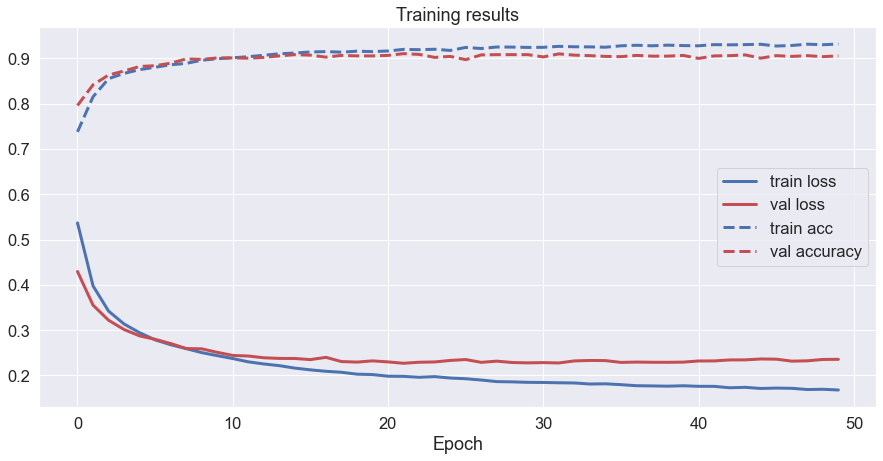

In [113]:
# plot loss and acc graph
fig, ax = plt.subplots(figsize=(15, 7))

ax.plot(h_callback.history['loss'], 'b', lw=3, label='train loss')
ax.plot(h_callback.history['val_loss'], 'r', lw=3, label='val loss')
ax.plot(h_callback.history['accuracy'], 'b--', lw=3, label='train acc')
ax.plot(h_callback.history['val_accuracy'], 'r--', lw=3, label='val accuracy')
ax.set(title='Training results',
       xlabel='Epoch')

plt.legend(loc='best')
plt.show()

## Early stopping your model

In [114]:
# define model arch
model = Sequential()

model.add(Dense(64, input_shape=(20,), activation='relu'))
model.add(Dense(3, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [116]:
# define early stopping callback
monitor_val_a = EarlyStopping(monitor='val_accuracy',
                              patience=5)

# train
model.fit(sensors_train, parcels_train,
          epochs=1000,
          validation_data=(sensors_test, parcels_test),
          callbacks=[monitor_val_a],
          verbose=2)

Train on 1400 samples, validate on 600 samples
Epoch 1/1000
1400/1400 - 1s - loss: 0.6296 - accuracy: 0.6957 - val_loss: 0.5046 - val_accuracy: 0.7878
Epoch 2/1000
1400/1400 - 0s - loss: 0.4454 - accuracy: 0.8052 - val_loss: 0.3991 - val_accuracy: 0.8278
Epoch 3/1000
1400/1400 - 0s - loss: 0.3670 - accuracy: 0.8376 - val_loss: 0.3425 - val_accuracy: 0.8556
Epoch 4/1000
1400/1400 - 0s - loss: 0.3294 - accuracy: 0.8514 - val_loss: 0.3182 - val_accuracy: 0.8711
Epoch 5/1000
1400/1400 - 0s - loss: 0.3100 - accuracy: 0.8636 - val_loss: 0.3036 - val_accuracy: 0.8728
Epoch 6/1000
1400/1400 - 0s - loss: 0.2948 - accuracy: 0.8700 - val_loss: 0.2882 - val_accuracy: 0.8739
Epoch 7/1000
1400/1400 - 0s - loss: 0.2829 - accuracy: 0.8764 - val_loss: 0.2821 - val_accuracy: 0.8850
Epoch 8/1000
1400/1400 - 0s - loss: 0.2769 - accuracy: 0.8805 - val_loss: 0.2752 - val_accuracy: 0.8839
Epoch 9/1000
1400/1400 - 0s - loss: 0.2644 - accuracy: 0.8864 - val_loss: 0.2708 - val_accuracy: 0.8900
Epoch 10/1000
140

## A combination of callbacks

In [119]:
# for banknote

# define model arch and compile
model = Sequential()

model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [120]:
# define early stopping callback
monitor_val_a = EarlyStopping(monitor='val_accuracy',
                              patience=5)

modelChkpt = ModelCheckpoint('best_banknote_model.hdf5', 
                             save_best_only=True)

# train
model.fit(X_train, y_train,
          epochs=1000000,
          validation_data=(X_test, y_test),
          callbacks=[monitor_val_a, modelChkpt],
          verbose=2)

Train on 960 samples, validate on 412 samples
Epoch 1/1000000
960/960 - 1s - loss: 1.0642 - accuracy: 0.4833 - val_loss: 0.9850 - val_accuracy: 0.4830
Epoch 2/1000000
960/960 - 0s - loss: 0.9219 - accuracy: 0.5063 - val_loss: 0.8538 - val_accuracy: 0.5073
Epoch 3/1000000
960/960 - 0s - loss: 0.8008 - accuracy: 0.5354 - val_loss: 0.7441 - val_accuracy: 0.5583
Epoch 4/1000000
960/960 - 0s - loss: 0.7012 - accuracy: 0.5844 - val_loss: 0.6555 - val_accuracy: 0.6311
Epoch 5/1000000
960/960 - 0s - loss: 0.6221 - accuracy: 0.6542 - val_loss: 0.5857 - val_accuracy: 0.7015
Epoch 6/1000000
960/960 - 0s - loss: 0.5606 - accuracy: 0.7125 - val_loss: 0.5315 - val_accuracy: 0.7573
Epoch 7/1000000
960/960 - 0s - loss: 0.5131 - accuracy: 0.8021 - val_loss: 0.4894 - val_accuracy: 0.8422
Epoch 8/1000000
960/960 - 0s - loss: 0.4762 - accuracy: 0.8833 - val_loss: 0.4562 - val_accuracy: 0.9126
Epoch 9/1000000
960/960 - 0s - loss: 0.4470 - accuracy: 0.9219 - val_loss: 0.4296 - val_accuracy: 0.9320
Epoch 10/